In [1]:

from fastai.vision.all import *


In [2]:

path = untar_data(URLs.PETS)/'images'

## this function returns True or False


def is_cat(x):
    return x[0].isupper()


In [4]:

dls = ImageDataLoaders.from_name_func(
               path,
               get_image_files(path),
               seed=42,
               valid_pct=0.2,
               label_func=is_cat,
               item_tfms=Resize(224)
)


In [5]:

learn = cnn_learner(dls, resnet34, metrics=error_rate )


In [6]:

learn.fine_tune(1)


epoch,train_loss,valid_loss,error_rate,time
0,0.159941,0.034426,0.012179,00:42


epoch,train_loss,valid_loss,error_rate,time
0,0.047620,0.022604,0.005413,00:44


In [7]:


print(   path.ls()   )



[Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_48.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_83.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_107.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_141.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_177.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_147.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_98.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_133.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_125.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_107.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_189.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_40.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_199.jpg'), Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_76.jpg'), Path(

In [ ]:

## '/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_83.jpg'


In [8]:

my_img = '/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_83.jpg'


In [9]:



img = PILImage.create( my_img )




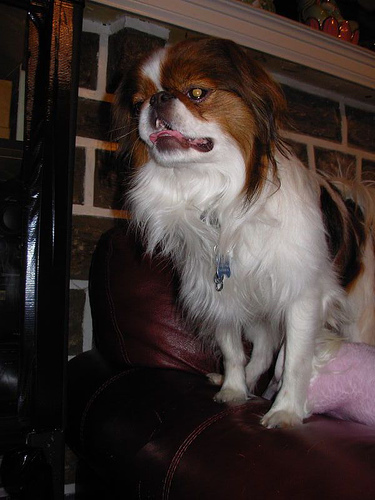

In [10]:

img


In [11]:



is_cat, _, probs = learn.predict(img)




In [12]:

print(is_cat)

print(probs)


False
tensor([1.0000e+00, 3.4725e-07])


In [13]:

my_img = '/root/.fastai/data/oxford-iiit-pet/images/Siamese_48.jpg'


In [14]:

img = PILImage.create( my_img )


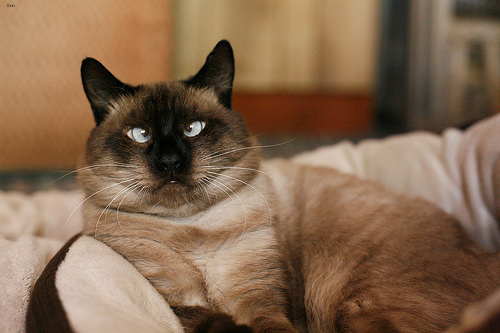

In [15]:

img


In [16]:

is_cat, _, probs = learn.predict(img)


In [17]:

print(is_cat)

print(probs)


True
tensor([4.4979e-12, 1.0000e+00])


In [18]:

path = untar_data(URLs.CAMVID_TINY)


In [19]:

path.ls()[2].ls()


(#100) [Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f04980_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0001TP_008940_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f02370_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0001TP_007860_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0006R0_f03630_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f03660_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0016E5_06570_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0001TP_010200_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0016E5_07973_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0001TP_009360_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0001TP_008400_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0001TP_008580_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0016E5_06090_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0006R0_f03450_P.png'),Path('/root/.fastai/data/camvid_tiny/labels/0016E5_06810_P.png'),Pat

In [20]:

label_func = lambda o: path/'labels'/f'{o.stem}_rc_P{o.suffix}'


In [21]:



a_path = Path('/root/.fastai/data/camvid_tiny/labels/0016E5_05310_P.png')

label_func(a_path)




Path('/root/.fastai/data/camvid_tiny/labels/0016E5_05310_P_rc_P.png')

In [22]:



dls = SegmentationDataLoaders.from_label_func(
        path,
        bs=8,
        fnames = get_image_files(path/"images"),
        label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
        codes=np.loadtxt(path/'codes.txt',
        dtype=str)
)






In [23]:

learn = unet_learner(dls, resnet34)


In [24]:

learn.fine_tune(8)


epoch,train_loss,valid_loss,time
0,2.908055,2.248646,00:01


epoch,train_loss,valid_loss,time
0,1.759912,1.542155,00:01
1,1.546720,1.407146,00:01
2,1.412076,1.303113,00:01
3,1.270106,0.940674,00:01
4,1.132575,0.875559,00:01
5,1.019848,0.824079,00:01
6,0.927475,0.837617,00:01
7,0.855248,0.829566,00:01


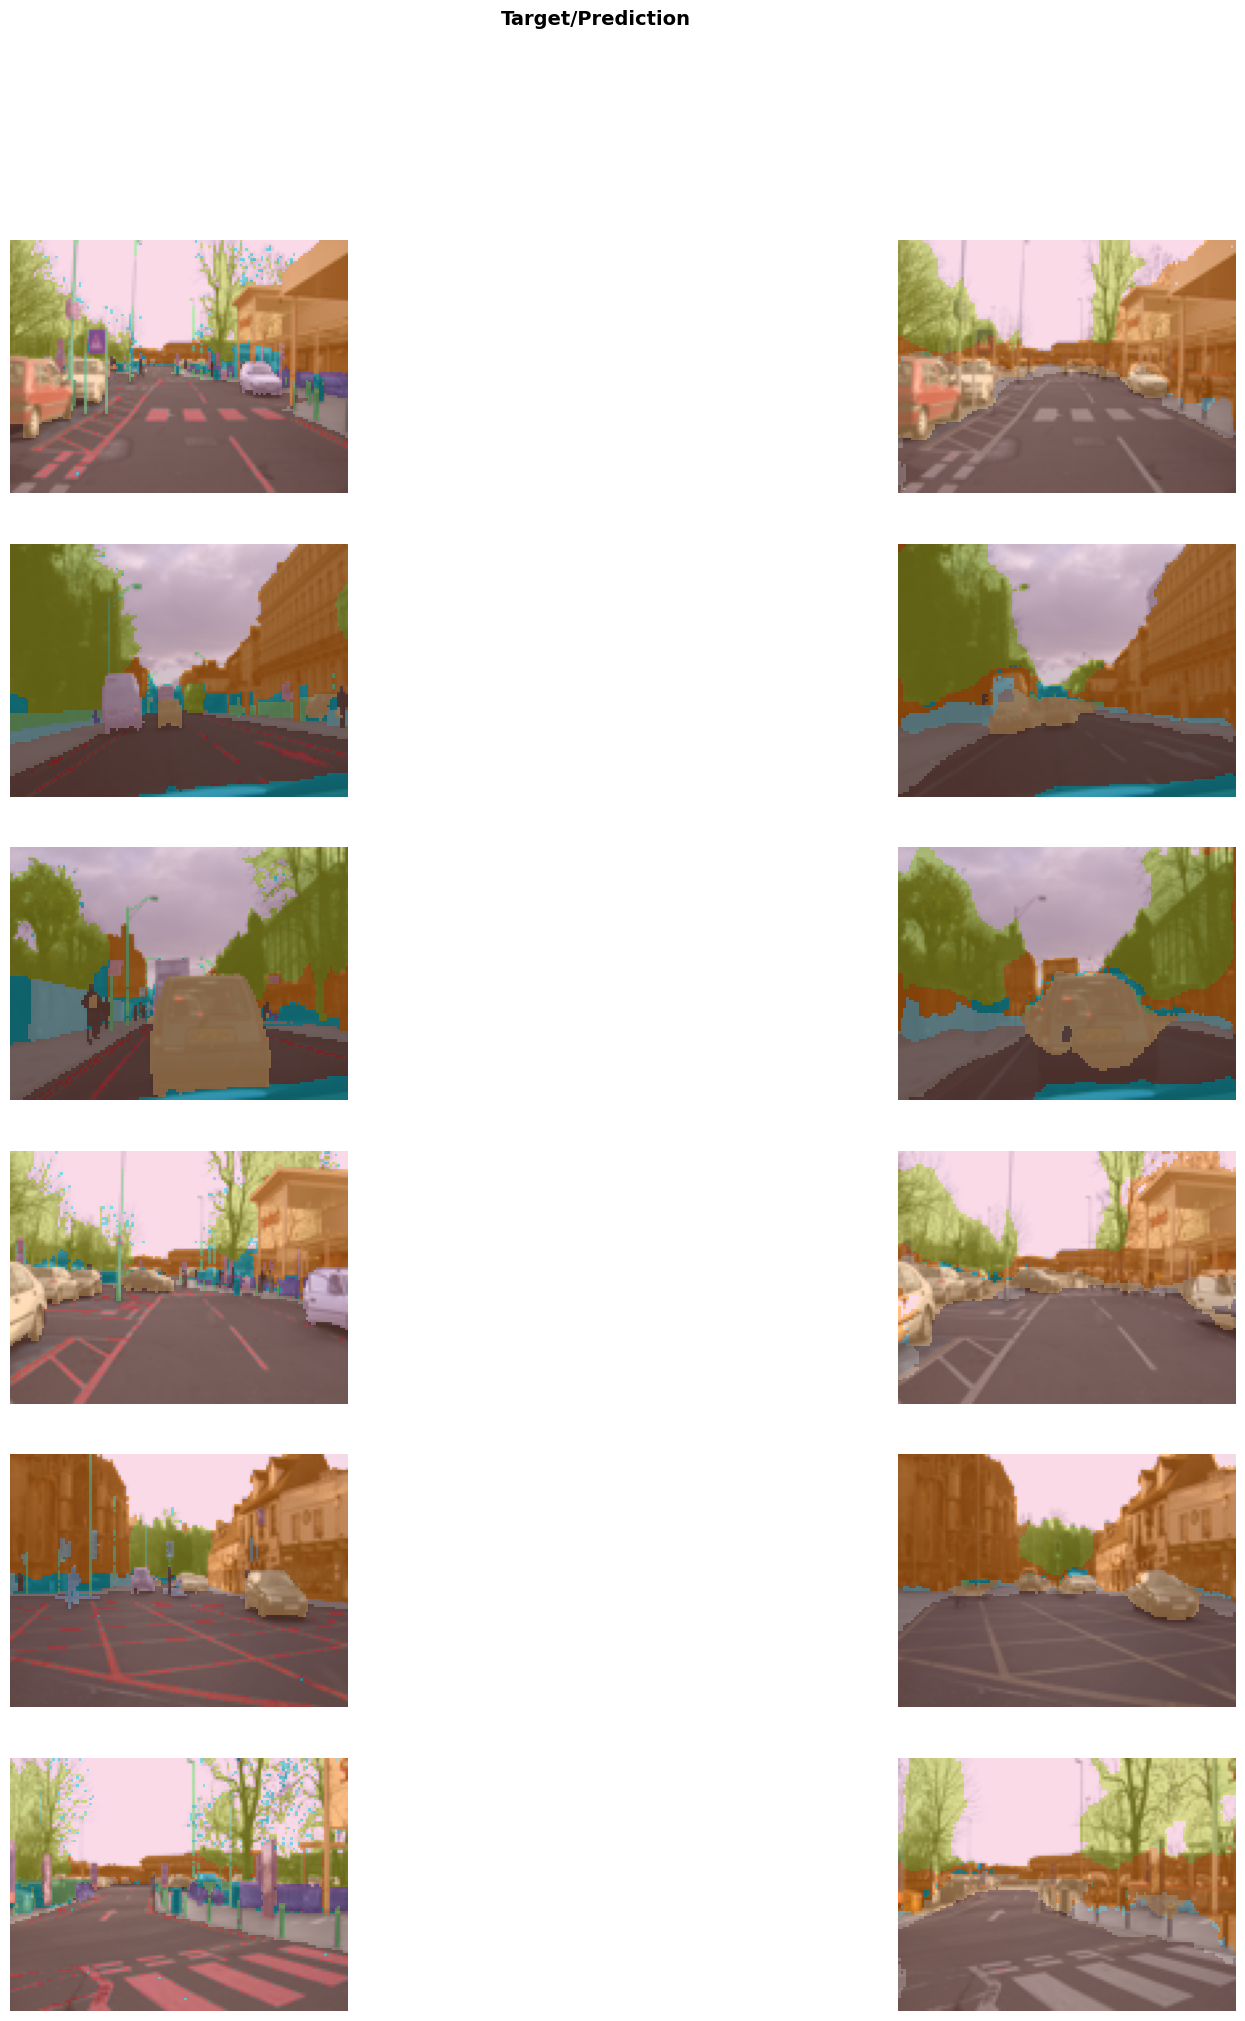

In [25]:

learn.show_results(max_n=6, figsize=(21, 23))


In [26]:

## MNIST

from fastai.vision.all import *

import numpy as np


##################################

## not the full MNIST. Just classes 7 and 3

path = untar_data(URLs.MNIST_SAMPLE)

print(   path.ls()   )


[Path('/root/.fastai/data/mnist_sample/train'), Path('/root/.fastai/data/mnist_sample/valid'), Path('/root/.fastai/data/mnist_sample/labels.csv')]


In [27]:

print(  (path/'train').ls()   )


[Path('/root/.fastai/data/mnist_sample/train/3'), Path('/root/.fastai/data/mnist_sample/train/7')]


In [28]:

threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()


In [29]:

threes


(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png'),Path('/root/.fastai/data/mnist_sample/train/3/10093.png'),Path('/root/.fastai/data/mnist_sample/train/3/10097.png'),Path('/root/.fastai/data/mnist_sample/train/3/10099.png'),Path('/root/.fastai/data/mnist_sample/train/3/10116.png'),Path('/root/.fastai/data/mnist_sample/train/3/10125.png'),Path('/root/.fastai/data/mnist_sample/train/3/10137.png'),Path('/root/.fastai/data/mnist_sample/train/3/10141.png'),Path('/ro

In [30]:

##print(  threes  )

im3_path = threes[1]


In [31]:





## uses PIL

im3 = Image.open(im3_path)

im3


In [32]:

## LOOKING at the image as a numpy array and PyTorch tensor

print(    np.array(im3)[4:10, 4:10]     )


[[  0   0   0   0   0   0]
 [  0   0   0   0   0  29]
 [  0   0   0  48 166 224]
 [  0  93 244 249 253 187]
 [  0 107 253 253 230  48]
 [  0   3  20  20  15   0]]


In [33]:



tensor(im3)[4:10, 4:10]




tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [34]:

import pandas as pd

im3_t = tensor(im3)

df = pd.DataFrame(im3_t[4:15, 4:22])

df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [35]:



seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]


In [36]:

print( len(three_tensors)  )
print( len(seven_tensors)  )


6131
6265


<Axes: >

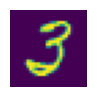

In [38]:

show_image(three_tensors[12])


In [39]:

## make all images in each list into 1 cube (i.e. a tensor of d=3)
## type float and normalized

stacked_sevens = torch.stack(   seven_tensors   ).float()/255
stacked_threes = torch.stack(   three_tensors   ).float()/255

print(  stacked_threes.shape  )


torch.Size([6131, 28, 28])


In [40]:



## tensor rank (dimesionality of vector space)

print(  stacked_threes.ndim   )




3


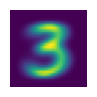

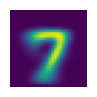

In [41]:

## insight: it is darker where all images match and blurry where images do not match

mean3 = stacked_threes.mean(0)     ## 0 is on the zero axis
show_image(mean3);

mean7 = stacked_sevens.mean(0)     ## 0 is on the zero axis
show_image(mean7);


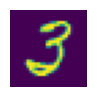

In [44]:



## Now we will measure the distance between one image and the mean of images for similarity

## Get any image from the stack of images

a_3 = stacked_threes[12]    ## slice one out
show_image(a_3);




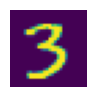

In [46]:


## Now we will measure the distance between one image and the mean of images for similarity

## Get any image from the stack of images

a_3 = stacked_threes[1]    ## slice one out
show_image(a_3);


In [45]:

dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()

print("single 3 to mean 3")
print(dist_3_abs)
print(dist_3_sqr)


single 3 to mean 3
tensor(0.1286)
tensor(0.2366)


In [47]:

dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()

print("single 3 to mean 3")
print(dist_3_abs)
print(dist_3_sqr)


single 3 to mean 3
tensor(0.1114)
tensor(0.2021)


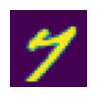

In [48]:

a_7 = stacked_sevens[1]    ## slice one out
show_image(a_7);


In [49]:

dist_3_abs = (a_7 - mean3).abs().mean()
dist_3_sqr = ((a_7 - mean3)**2).mean().sqrt()

print("single 3 to mean 3")
print(dist_3_abs)
print(dist_3_sqr)


single 3 to mean 3
tensor(0.1854)
tensor(0.3271)


In [50]:

## L1 and L2 are in torch
## import torch.nn.functional as torch_f
## or
## fastai already has its own way of calling them

print(   F.l1_loss( a_3.float(), mean7)   )
print(   F.mse_loss(a_3, mean7).sqrt()    )


tensor(0.1586)
tensor(0.3021)


In [51]:

data = [[1, 2, 3], [4, 5, 6]]

arr  = array(data)              ## fastai's way of incorporating numpy
tns  = tensor(data)             ## fastai's way of incorporating torch

print(arr)
print(tns)


[[1 2 3]
 [4 5 6]]
tensor([[1, 2, 3],
        [4, 5, 6]])


In [52]:

type(arr)


numpy.ndarray

In [53]:

type(tns)


torch.Tensor

In [56]:

## a fastai approach


train_x = torch.cat(   [stacked_threes, stacked_sevens]   ).view(-1, 28*28)

train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)  # unsqueeze to make column vector

dset = list(     zip(train_x, train_y)   )


In [59]:


valid_3_tens = torch.stack(   [  tensor(Image.open(o))  for o in (path/'valid'/'3').ls()]   )
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack(   [  tensor(Image.open(o))  for o in (path/'valid'/'7').ls()]   )
valid_7_tens = valid_7_tens.float()/255


In [60]:

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))



In [61]:

dl = DataLoader(dset, batch_size=256)


In [62]:

valid_dl = DataLoader(valid_dset, batch_size=256)


In [72]:

dls = DataLoaders(dl, valid_dl)



In [64]:



def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(  targets==1, 1-predictions, predictions   ).mean()



In [65]:


def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds > 0.5) == yb
    return correct.float().mean()


In [66]:

simple_net = nn.Sequential(
       nn.Linear(28*28, 30),
       nn.ReLU(),
       nn.Linear(30, 1)
)



In [67]:

learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)


In [68]:

learn.fit(40, lr=0.1)


epoch,train_loss,valid_loss,batch_accuracy,time
0,0.288226,0.417768,0.504907,00:00
1,0.137884,0.218426,0.818940,00:00
2,0.077171,0.110818,0.917566,00:00
3,0.051369,0.075513,0.943081,00:00
4,0.039370,0.059221,0.958292,00:00
5,0.033194,0.050027,0.964181,00:00
6,0.029605,0.044206,0.965653,00:00
7,0.027247,0.040205,0.968106,00:00
8,0.025535,0.037279,0.968106,00:00
9,0.024204,0.035039,0.972522,00:00


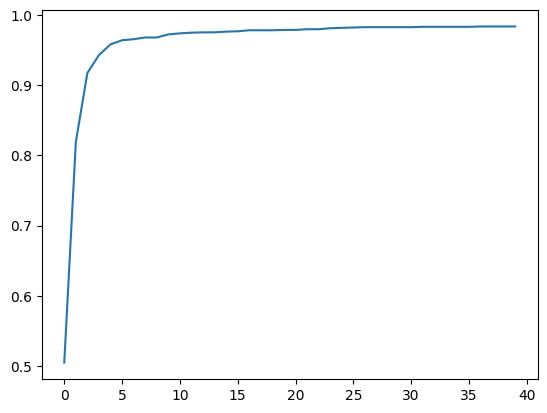

In [69]:



plt.plot(   L(learn.recorder.values).itemgot(2)   );




In [73]:

## dls = ImageDataLoaders.from_folder(path)

learn = cnn_learner(dls,
                    resnet18,
                    pretrained=True,
                    loss_func=F.cross_entropy, metrics=accuracy)





AssertionError: `n_out` is not defined, and could not be inferred from data, set `dls.c` or pass `n_out`